<a href="https://colab.research.google.com/github/Sreya602/OIBSIP-Wine-Quality-Prediction-Task-6/blob/main/WineQT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  **Wine Quality Prediction**
In this project we are analysing the provided wine quality dataset to predict wine quality. The focus is on predicting the quality of wine based on its chemical features like density and acidity, tested with three machine learning models.




## **Load the dataset**




In [ ]:
import pandas as pd

df = pd.read_csv('/content/WineQT.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4




**Findings:**
- The dataset contains **1143 rows and 13 columns**.
- Columns include wine properties such as `fixed acidity`, `volatile acidity`, `citric acid`, `residual sugar`, `chlorides`, `pH`, `sulphates`, `alcohol`, and the target variable `quality`.
- An `Id` column is also present, which is just an identifier and not useful for prediction.


## **Explore the data**




In [ ]:
print("Shape of the DataFrame:")
display(df.shape)

print("\nSummary statistics of numerical features:")
display(df.describe())

print("\nMissing values in each column:")
display(df.isnull().sum())

Shape of the DataFrame:


(1143, 13)


Summary statistics of numerical features:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000



Missing values in each column:


,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


**Findings:**
 The dataset has 1143 samples and 13 features.
- The dataset is clean with **no missing values**.
- Most wines fall into a **medium quality range (score ~5–6)**.
- Feature ranges vary (e.g., alcohol: 8.4–14.9, quality: 3–8), which may affect model performance without scaling.

**Data Preprocessing**

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Identify numerical columns for outlier detection, excluding 'quality' and 'Id'
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
numerical_cols.remove('quality')
numerical_cols.remove('Id')

# Handle outliers using z-score capping (a common approach)
for col in numerical_cols:
    z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())
    # Define a z-score threshold, e.g., 3
    threshold = 3
    # Cap values outside the threshold
    df[col] = np.where(z_scores > threshold, df[col].mean() + np.sign(df[col] - df[col].mean()) * threshold * df[col].std(), df[col])


# Separate features (X) and target (y)
X = df.drop(['quality', 'Id'], axis=1)
y = df['quality']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Shape of X_train, X_test, y_train, y_test:")
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Shape of X_train, X_test, y_train, y_test:


(914, 11)

(229, 11)

(914,)

(229,)

**Findings:**
- The dataset was successfully split into:
  - Training set: **914 samples**
  - Testing set: **229 samples**
- After preprocessing, the data is clean, normalized, and ready for model training.

## **Train and evaluate models**



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

# Instantiate models
rf_model = RandomForestClassifier(random_state=42)
sgd_model = SGDClassifier(loss='log_loss', random_state=42, max_iter=1000)
svc_model = SVC(random_state=42)

# Train models
rf_model.fit(X_train, y_train)
sgd_model.fit(X_train, y_train)
svc_model.fit(X_train, y_train)

# Evaluate models
rf_accuracy = rf_model.score(X_test, y_test)
sgd_accuracy = sgd_model.score(X_test, y_test)
svc_accuracy = svc_model.score(X_test, y_test)

# Print accuracies
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print(f"SGD Classifier Accuracy: {sgd_accuracy:.4f}")
print(f"SVC Accuracy: {svc_accuracy:.4f}")

Random Forest Accuracy: 0.7074
SGD Classifier Accuracy: 0.5459
SVC Accuracy: 0.6288


Here three machine learning models are trained:
  - **Random Forest Classifier**
  - **Stochastic Gradient Descent (SGD) Classifier**
  - **Support Vector Classifier (SVC)**

**Findings:**
- Random Forest can handle complex relationships and non-linearity well.
- SGD Classifier is lightweight and efficient for large datasets.
- SVC is powerful for smaller datasets with clear margins between classes.
- Accuracy scores are computed for comparison in the next step.


## **Visualize results**



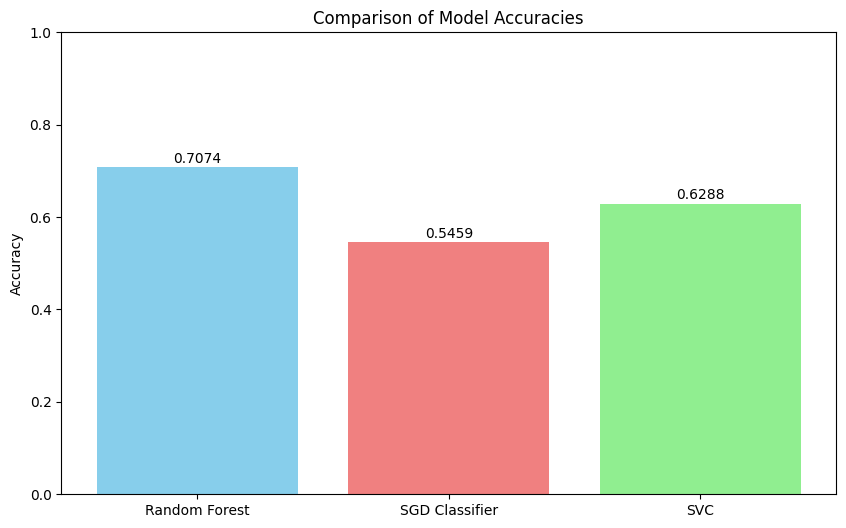

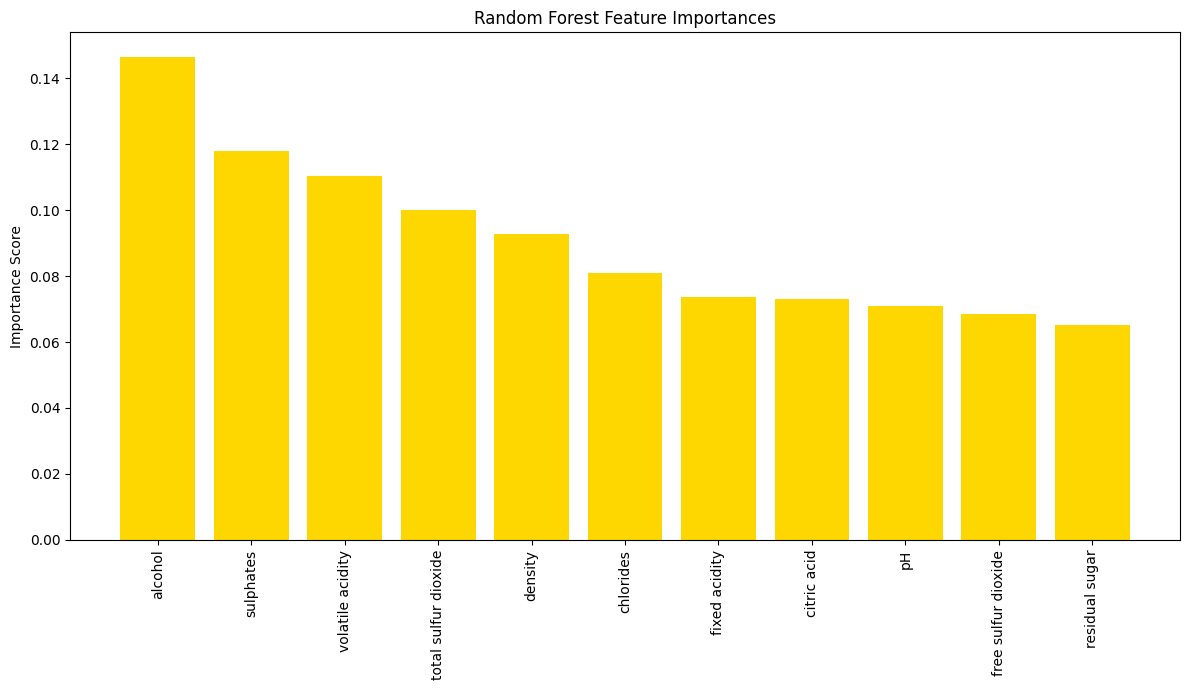

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create a bar plot for model accuracies
models = ['Random Forest', 'SGD Classifier', 'SVC']
accuracies = [rf_accuracy, sgd_accuracy, svc_accuracy]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.01, f'{accuracy:.4f}', ha='center')
plt.ylim(0, 1)
plt.show()

# Extract and visualize feature importances from Random Forest model
feature_importances = rf_model.feature_importances_
features = X.columns
sorted_indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(12, 7))
plt.bar(features[sorted_indices], feature_importances[sorted_indices], color='gold')
plt.xticks(rotation=90)
plt.ylabel('Importance Score')
plt.title('Random Forest Feature Importances')
plt.tight_layout()
plt.show()

### Data Analysis Key Findings

*   The dataset contains 1143 rows and 13 columns and has no missing values.
*   The Random Forest Classifier achieved the highest accuracy (70.74\%) among the three models evaluated.
*   The Support Vector Classifier (SVC) had an accuracy of 62.88\%.
*   The Stochastic Gradient Descent (SGD) Classifier had the lowest accuracy at 54.59\%.
*   Random Forest outperformed the other models and identified **alcohol, sulphates, and volatile acidity** as the most important features influencing wine quality.

### Insights

* Random Forest appears to be the most suitable model among the tested ones for predicting wine quality based on the given features.

* Further analysis of feature importances from the Random Forest model could guide future efforts to understand which chemical properties are most critical for wine quality.

* Improve wine quality by focusing on **alcohol content** and **sulphates**, as they are strong predictors.

*   
   Monitor **volatile acidity**, since higher levels negatively impact wine quality.





  
   
In short,Random Forest is the most effective model for this dataset, achieving ~71% accuracy. The analysis provides actionable insights into which chemical properties most strongly influence wine quality, which can guide both prediction tasks and winemaking practices.
